#### 0.0 Imports

In [1]:
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

C:\Users\davir\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 1.0 Importar dados

In [2]:
dataset= pd.read_csv('Churn.csv', sep= ';')

In [3]:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
dataset.shape

(999, 12)

In [5]:
names_columns =["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

dataset.columns= names_columns

In [6]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
# explorardados categoricos:

estado= dataset.groupby('Estado').size()
estado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

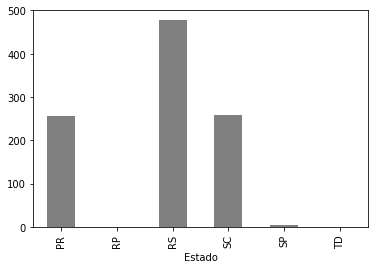

In [8]:
estado.plot.bar(color='gray')
plt.show()

In [9]:
genero = dataset.groupby('Genero').size()
genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

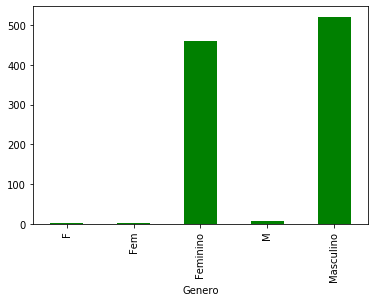

In [10]:
genero.plot.bar(color='green')
plt.show()

In [11]:
# observe que precisamos corrigir esses dados de genero

In [12]:
##explorar dados numericos

dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

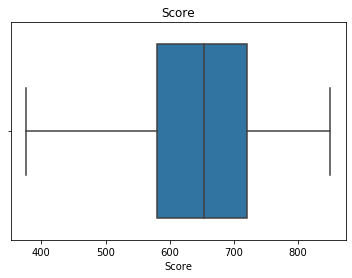

In [13]:
sns.boxplot(dataset['Score']).set_title('Score')
plt.show()

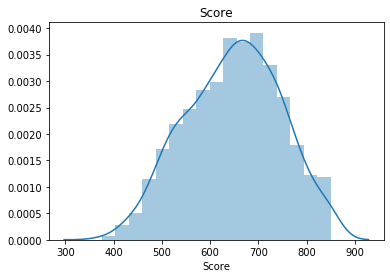

In [14]:
sns.distplot(dataset['Score']).set_title('Score')
plt.show()

In [15]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

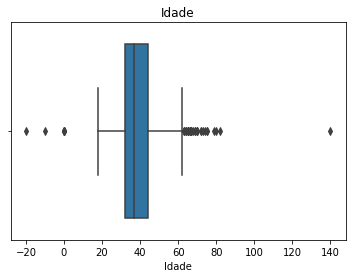

In [16]:
sns.boxplot(dataset['Idade']).set_title('Idade')
plt.show()

In [17]:
#pelo grafico acima há problemas com a idade:1)idades negativas; 2) Pessoa com idade 140

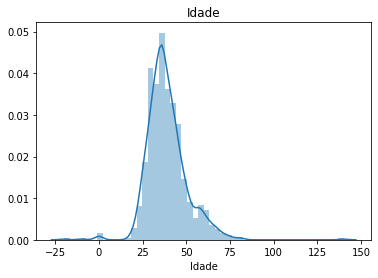

In [18]:
sns.distplot(dataset['Idade']).set_title('Idade')
plt.show()

In [19]:
#salario
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

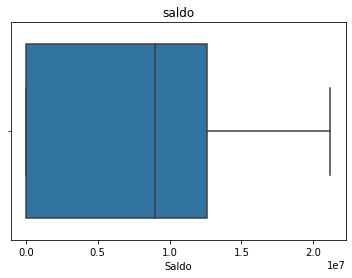

In [20]:
sns.boxplot(dataset['Saldo']).set_title('saldo')
plt.show()

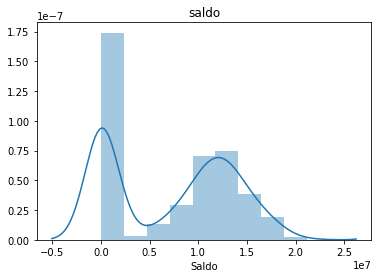

In [21]:
sns.distplot(dataset['Saldo']).set_title('saldo')
plt.show()

In [22]:
#salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

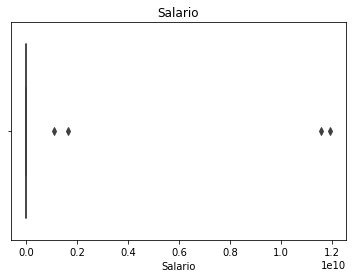

In [23]:
sns.boxplot(dataset['Salario']).set_title('Salario')
plt.show()

#### Tratamento dos dados

In [24]:
#contamos valores NAN
#genero e salário

dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [25]:
mediana_salario = sts.median(dataset['Salario'])
mediana_salario

70518.0

In [26]:
###substitutir4 na pela mediana
dataset['Salario'].fillna(mediana_salario, inplace=True)

In [27]:
dataset['Salario'].isnull().sum()

0

In [28]:
sts.stdev(dataset['Salario'])

528724131.4346197

In [29]:
#precisamos corrigir os dados:
sexo=dataset.groupby('Genero').size()
sexo

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [30]:
##nulos
dataset['Genero'].isnull().sum()

8

In [31]:
###vamos substituti os NA por Masculino por criterio tecnico o que mais ocorre
dataset['Genero'].fillna('Masculino', inplace=True)

In [32]:
dataset['Genero'].isnull().sum()

0

In [33]:
dataset.loc[dataset['Genero']=='M','Genero']='Masculino'

In [34]:
dataset.groupby('Genero').size()

Genero
F              2
Fem            1
Feminino     461
Masculino    535
dtype: int64

In [35]:
#dataset.loc[(dataset['Genero']=='F') | (dataset['Genero']=='Fem'), 'Genero']='Feminino'
#outra forma
condition=['F','Fem']
dataset.loc[dataset['Genero'].isin(condition),'Genero']='Feminino'

In [36]:
dataset.groupby('Genero').size()

Genero
Feminino     464
Masculino    535
dtype: int64

In [37]:
##Agora esta certo

In [38]:
#idade fora do dominio


In [39]:
mediana=sts.median(dataset['Idade'])
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] >120), 'Idade']=mediana

In [40]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] >120), 'Idade']

Series([], Name: Idade, dtype: int64)

In [41]:
dataset[dataset.duplicated('Id',keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [42]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

In [43]:
dataset[dataset.duplicated('Id', keep=False)] ##ok

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [44]:
##estado fora do dominio so a estados no sul
dataset.groupby('Estado').size()

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [45]:
#fora- atribuir a moda
#'RP','SP','TD'
condition=['RP','SP','TD']

dataset.loc[dataset['Estado'].isin(condition), 'Estado']='RS'



In [46]:
dataset.groupby('Estado').size()

Estado
PR    257
RS    483
SC    258
dtype: int64

In [47]:
dataset['Salario']

0      10134888.0
1      11254258.0
2      11393157.0
3       9382663.0
4        790841.0
          ...    
994    14576583.0
995     8391224.0
996     7843973.0
997      677692.0
998      990342.0
Name: Salario, Length: 998, dtype: float64

In [48]:
#outliers em salário, vamos considerar 2 desvios padrão
#desv= sts.stdev(dataset['Salario'])
desv=sts.stdev(dataset['Salario'])

In [49]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario']> 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [50]:
#vamos atualiar salarios para mediana, calculamo
mediana= sts.median(dataset['Salario'])

In [51]:
dataset.loc[dataset['Salario']> 2*desv, 'Salario']=mediana

In [52]:
dataset.loc[dataset['Salario']> 2*desv]  #ok

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [53]:
dataset.shape

(998, 12)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              998 non-null    int64  
 1   Score           998 non-null    int64  
 2   Estado          998 non-null    object 
 3   Genero          998 non-null    object 
 4   Idade           998 non-null    int64  
 5   Patrimonio      998 non-null    int64  
 6   Saldo           998 non-null    int64  
 7   Produtos        998 non-null    int64  
 8   TemCartCredito  998 non-null    int64  
 9   Ativo           998 non-null    int64  
 10  Salario         998 non-null    float64
 11  Saiu            998 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 101.4+ KB


In [55]:
dataset.sample()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
991,993,615,RS,Feminino,35,2,9744002,2,1,1,1398161.0,0


 Agora está tudo certo!

**Keep calm and analysing data!**